In [1]:
import nltk
import string
import collections
import stanfordnlp
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
#import gensim

from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /Users/rudesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rudesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rudesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rudesh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/rudesh/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
#reading the text file to a variable

paragraph = open('steve_jobs.txt', 'r').read()

paragraph

'I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.\n\nThe first story is about connecting the dots.\n\nI dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?\n\nIt started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night as

**Split the text into sentences**

In [4]:
#splitting the sentences in the paragraph and tokenising

sentences = nltk.sent_tokenize(paragraph)
for sent in sentences:
    print("Sentence:")
    print(sent)
    print()

Sentence:
I am honored to be with you today at your commencement from one of the finest universities in the world.

Sentence:
I never graduated from college.

Sentence:
Truth be told, this is the closest I’ve ever gotten to a college graduation.

Sentence:
Today I want to tell you three stories from my life.

Sentence:
That’s it.

Sentence:
No big deal.

Sentence:
Just three stories.

Sentence:
The first story is about connecting the dots.

Sentence:
I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit.

Sentence:
So why did I drop out?

Sentence:
It started before I was born.

Sentence:
My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption.

Sentence:
She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife.

Sentence:
Except that when I popped out they

**Split the text into words**

In [5]:
#split words in sentences just using spaces, also i have tried the tokenised method too, refer next cell

words = paragraph.split()

print('Split the paragraph into words and removed stops and commas')
print(words)

Split the paragraph into words and removed stops and commas
['I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world.', 'I', 'never', 'graduated', 'from', 'college.', 'Truth', 'be', 'told,', 'this', 'is', 'the', 'closest', 'I’ve', 'ever', 'gotten', 'to', 'a', 'college', 'graduation.', 'Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life.', 'That’s', 'it.', 'No', 'big', 'deal.', 'Just', 'three', 'stories.', 'The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots.', 'I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first', '6', 'months,', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop-in', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'I', 'really', 'quit.', 'So', 'why', 'did', 'I', 'drop', 'out?', 'It', 'started', 'before', 'I', 'was', 'born.', 'My', 'biological', 'mother', 'was', 'a', 'young,', 'unwed', 'college

In [6]:
#tokenising the words in sentences

tokens = word_tokenize(paragraph)

print('Split the paragraph into words by using tokenize method')
print(tokens)

Split the paragraph into words by using tokenize method
['I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', '.', 'I', 'never', 'graduated', 'from', 'college', '.', 'Truth', 'be', 'told', ',', 'this', 'is', 'the', 'closest', 'I', '’', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', '.', 'Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', '.', 'That', '’', 's', 'it', '.', 'No', 'big', 'deal', '.', 'Just', 'three', 'stories', '.', 'The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', '.', 'I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first', '6', 'months', ',', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop-in', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'I', 'really', 'quit', '.', 'So', 'why', 'did', 'I', 'drop', 'out', '?', 'It', 'started', 'before', 'I', 'was', 'born', '.', 'My',

**Count the number of sentences, words and word types**

In [7]:
#counting number of words and sentences in the source

print('Total words:   ', len(paragraph.split()))
print('Total sentences:    ', paragraph.count('.'))

Total words:    2246
Total sentences:     142


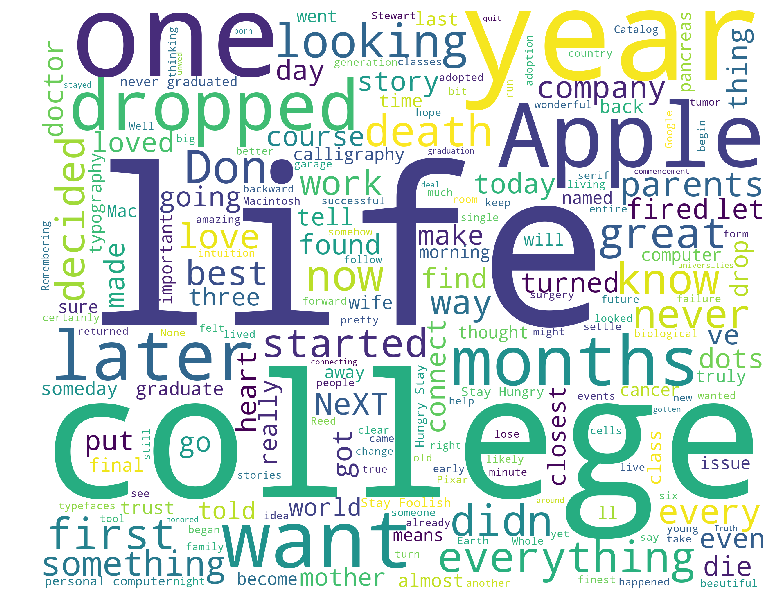

In [8]:
#creating a wordcloud, more the word appears the bigger it shows here

word_types = ' '.join(sentences)
wordcloud = WordCloud(background_color='white', width=2500, height=2000).generate(word_types)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Average length of the sentences and the average length of the words**

In [9]:
x = 0
for sent in sentences:
    words_count = sent.split()
    x += len(words_count)
        
print('Average length of a sentence: ', int(x/paragraph.count('.')))

Average length of a sentence:  15


In [10]:
print('Average length of a word', int((len(paragraph) - paragraph.count(' '))/len(paragraph.split())))

Average length of a word 4


**50 most frequent words in the document**

[('I', 93), ('the', 91), ('to', 71), ('and', 49), ('was', 48), ('a', 46), ('’', 43), ('of', 40), ('that', 38), ('it', 37), ('in', 33), ('you', 32), ('is', 29), ('my', 25), ('had', 22), ('out', 20), ('with', 19), ('t', 19), ('It', 18), ('me', 18), ('And', 18), ('for', 17), ('have', 17), ('all', 16), ('life', 15), ('be', 14), ('your', 14), ('as', 14), ('on', 14), ('what', 14), ('from', 13), ('college', 12), ('at', 11), ('so', 11), ('do', 11), ('one', 9), ('s', 9), ('about', 9), ('but', 9), ('very', 9), ('when', 9), ('would', 9), ('years', 9), ('Apple', 9), ('never', 8), ('this', 7), ('The', 7), ('dropped', 7), ('months', 7), ('they', 7)]


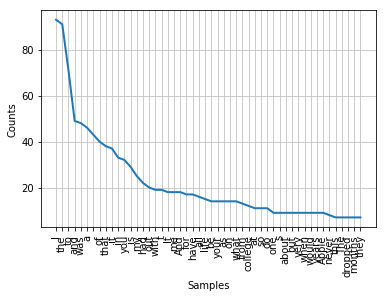

In [11]:
text = "".join([ch for ch in paragraph if ch not in string.punctuation])
tokens_dist = nltk.word_tokenize(text)

freq_dist = nltk.FreqDist(tokens_dist)
print(freq_dist.most_common(50))
freq_dist.plot(50)

**hapax legomena**

In [12]:
#counting genuine words in the source in other words hapax legomena

text_hapax = paragraph.lower()

#create Default dictionary 
word_count = collections.defaultdict(int)


#split text and update result dictionary
for h_word in text_hapax.split():
  if h_word: #ignore whitespace
    word_count[h_word] += 1


#list which save word which value is 1
hapax_words = list()
for hl_word, value in word_count.items():
  if value==1:
    hapax_words.append(hl_word)

print("hapax words:", hapax_words)
print()
print('Total hapax legomena: ', len(hapax_words))


hapax words: ['honored', 'commencement', 'universities', 'truth', 'told,', 'gotten', 'graduation.', 'stories', 'that’s', 'deal.', 'stories.', 'connecting', 'dots.', '6', 'stayed', 'around', 'drop-in', '18', 'quit.', 'why', 'out?', 'born.', 'unwed', 'student,', 'adoption.', 'strongly', 'graduates,', 'set', 'birth', 'lawyer', 'except', 'popped', 'girl.', 'parents,', 'waiting', 'list,', 'call', 'middle', 'asking:', '“we', 'unexpected', 'baby', 'boy;', 'him?”', 'said:', '“of', 'course.”', 'father', 'high', 'school.', 'refused', 'sign', 'adoption', 'papers.', 'relented', 'promised', '17', 'naively', 'chose', 'expensive', 'stanford,', 'working-class', 'savings', 'spent', 'tuition.', 'couldn’t', 'value', 'figure', 'spending', 'money', 'saved', 'ok.', 'scary', 'time,', 'decisions', 'made.', 'stop', 'taking', 'required', 'classes', 'interest', 'dropping', 'ones', 'interesting.', 'wasn’t', 'romantic.', 'dorm', 'room,', 'slept', 'floor', 'friends’', 'rooms,', 'coke', 'bottles', '5¢', 'deposits', 

**Stemming**

In [13]:
#stemming the source

st_sentences = nltk.sent_tokenize(paragraph.lower())
stem_sentence = []
stemmer = PorterStemmer()

# Stemming
for i in range(len(st_sentences)):
    st_words = nltk.word_tokenize(st_sentences[i])
    st_words = [stemmer.stem(st_word) for st_word in st_words]
    st_sentences[i] = ' '.join(st_words)
    stem_sentence.append(st_sentences[i])
    print(st_words)

['i', 'am', 'honor', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commenc', 'from', 'one', 'of', 'the', 'finest', 'univers', 'in', 'the', 'world', '.']
['i', 'never', 'graduat', 'from', 'colleg', '.']
['truth', 'be', 'told', ',', 'thi', 'is', 'the', 'closest', 'i', '’', 've', 'ever', 'gotten', 'to', 'a', 'colleg', 'graduat', '.']
['today', 'i', 'want', 'to', 'tell', 'you', 'three', 'stori', 'from', 'my', 'life', '.']
['that', '’', 's', 'it', '.']
['no', 'big', 'deal', '.']
['just', 'three', 'stori', '.']
['the', 'first', 'stori', 'is', 'about', 'connect', 'the', 'dot', '.']
['i', 'drop', 'out', 'of', 'reed', 'colleg', 'after', 'the', 'first', '6', 'month', ',', 'but', 'then', 'stay', 'around', 'as', 'a', 'drop-in', 'for', 'anoth', '18', 'month', 'or', 'so', 'befor', 'i', 'realli', 'quit', '.']
['so', 'whi', 'did', 'i', 'drop', 'out', '?']
['it', 'start', 'befor', 'i', 'wa', 'born', '.']
['my', 'biolog', 'mother', 'wa', 'a', 'young', ',', 'unw', 'colleg', 'graduat', 'student', ','

[('the', 93), ('i', 73), ('to', 71), ('and', 51), ('wa', 48), ('a', 46), ('’', 43), ('it', 43), ('of', 41), ('that', 38), ('in', 33), ('you', 32), ('is', 29), ('my', 26), ('had', 22), ('.i', 20), ('out', 20), ('with', 19), ('t', 19), ('be', 18), ('me', 18), ('life', 17), ('for', 17), ('have', 17), ('all', 16), ('.and', 16), ('your', 14), ('colleg', 14), ('as', 14), ('on', 14), ('what', 14), ('from', 13), ('.it', 13), ('year', 12), ('at', 11), ('so', 11), ('do', 11), ('one', 10), ('drop', 10), ('want', 9), ('s', 9), ('about', 9), ('but', 9), ('veri', 9), ('when', 9), ('we', 9), ('would', 9), ('look', 9), ('love', 9), ('appl', 9)]


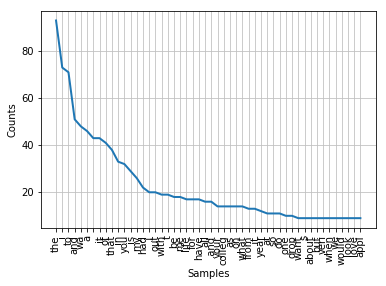

In [14]:
#distribution of stem

text = "".join([ch for ch in stem_sentence if ch not in string.punctuation])
tokens_dist = nltk.word_tokenize(text.replace(',', ''))

stem_dist = nltk.FreqDist(tokens_dist)
print(stem_dist.most_common(50))
stem_dist.plot(50)

**Stopwords**

In [15]:
#stopwords in the language

english_stopwords = set(nltk.corpus.stopwords.words('english'))
print(english_stopwords)

{'when', 'your', 'from', 'off', "she's", 'few', 'further', 'he', 'does', 'me', 'they', 'most', "couldn't", 'or', 'so', 'below', "shan't", 'mightn', 'above', "wasn't", 'this', 've', 'why', 'both', 'into', 'that', 'for', 'should', 'the', 'under', 'by', 'haven', 'shouldn', 'do', 'mustn', 'what', 'didn', 'ma', 'once', 'isn', 'our', 'be', 'where', 'myself', 'own', 'being', 'before', "won't", "hasn't", "hadn't", 'won', 'we', 'to', 'a', 'his', 's', 'himself', 'm', 'aren', 'did', 'how', 'needn', 'is', 'she', 'only', 'ain', 'who', "you'd", "needn't", "haven't", 'has', 'then', 'd', "you'll", 'these', 'its', 'o', 'themselves', 'more', 'each', 'now', "doesn't", 'those', 'are', 't', 're', 'doesn', 'on', 'between', 'am', 'after', 'them', 'as', 'having', 'had', 'other', 'but', "didn't", "you've", "weren't", 'out', 'some', 'y', 'can', "you're", 'about', 'through', 'same', 'wasn', 'here', "aren't", 'her', 'any', 'shan', 'because', 'at', 'just', 'herself', 'hasn', 'i', 'not', 'my', 'itself', 'll', "must

In [16]:
#removing stopwords

stop_tokens = word_tokenize(paragraph.replace('.', '').replace(',', ''))
content_tokens = [token for token in stop_tokens if token.lower() not in english_stopwords]

In [17]:
print('Remaining words after removing stopwords: ')
print()
print(content_tokens)

Remaining words after removing stopwords: 

['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college', 'Truth', 'told', 'closest', '’', 'ever', 'gotten', 'college', 'graduation', 'Today', 'want', 'tell', 'three', 'stories', 'life', '’', 'big', 'deal', 'three', 'stories', 'first', 'story', 'connecting', 'dots', 'dropped', 'Reed', 'College', 'first', '6', 'months', 'stayed', 'around', 'drop-in', 'another', '18', 'months', 'really', 'quit', 'drop', '?', 'started', 'born', 'biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption', 'felt', 'strongly', 'adopted', 'college', 'graduates', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', 'Except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', 'parents', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', ':', '“', 'unexpected', 'baby', 'boy', ';', 'want', '?', '”', 'said', ':', '“', 'course', '”', 'biolog

In [18]:
freq_dist_no_stop = nltk.FreqDist(stop_tokens)

print('Remaining word types: ')
print(freq_dist_no_stop.most_common())

Remaining word types: 
[('I', 93), ('the', 91), ('to', 71), ('and', 49), ('was', 48), ('a', 46), ('’', 43), ('of', 40), ('that', 38), ('it', 37), ('in', 33), ('you', 32), ('is', 29), ('my', 25), ('had', 22), ('out', 20), ('with', 19), ('t', 19), ('It', 18), ('me', 18), ('And', 18), ('for', 17), ('have', 17), ('all', 16), ('life', 15), ('be', 14), ('your', 14), ('as', 14), ('on', 14), ('what', 14), ('from', 13), ('college', 12), ('at', 11), ('so', 11), ('do', 11), ('one', 9), ('s', 9), ('about', 9), ('but', 9), ('very', 9), ('when', 9), ('would', 9), ('years', 9), ('Apple', 9), ('never', 8), (':', 8), ('this', 7), ('The', 7), ('dropped', 7), ('months', 7), ('they', 7), ('looking', 7), ('we', 7), ('just', 7), ('want', 6), ('first', 6), ('then', 6), ('So', 6), ('by', 6), ('were', 6), ('“', 6), ('an', 6), ('”', 6), ('later', 6), ('only', 6), ('didn', 6), ('great', 6), ('know', 6), ('now', 6), ('Stay', 6), ('ever', 5), ('did', 5), ('started', 5), ('My', 5), ('decided', 5), ('everything', 5)

In [19]:
print('Remaining percentage % of remaining word tokens: ', 100 * (len(content_tokens)/len(paragraph.split())))

Remaining percentage % of remaining word tokens:  48.17453250222618


In [20]:
print('Remaining percentage % of remaining word types: ', 100 * (len(freq_dist_no_stop.most_common())/len(freq_dist.most_common())))

Remaining percentage % of remaining word types:  100.53547523427042


**POS Tagging**

In [21]:
# POS Tagging
pos_words = nltk.word_tokenize(paragraph)

tagged_words = nltk.pos_tag(pos_words)

# Tagged word paragraph
tags = [] #here i save all the tags for future use, for distribution
word_tags = []
for tw in tagged_words:
    #print(tw)
    word_tags.append(tw[0]+"_"+tw[1])
    tags.append(tw[1])

pos_tagged_paragraph = ' '.join(word_tags)

In [22]:
#tags
print(word_tags)

['I_PRP', 'am_VBP', 'honored_VBN', 'to_TO', 'be_VB', 'with_IN', 'you_PRP', 'today_NN', 'at_IN', 'your_PRP$', 'commencement_NN', 'from_IN', 'one_CD', 'of_IN', 'the_DT', 'finest_JJS', 'universities_NNS', 'in_IN', 'the_DT', 'world_NN', '._.', 'I_PRP', 'never_RB', 'graduated_VBD', 'from_IN', 'college_NN', '._.', 'Truth_NN', 'be_VB', 'told_VBN', ',_,', 'this_DT', 'is_VBZ', 'the_DT', 'closest_JJS', 'I_PRP', '’_VBP', 've_JJ', 'ever_RB', 'gotten_VBN', 'to_TO', 'a_DT', 'college_NN', 'graduation_NN', '._.', 'Today_NN', 'I_PRP', 'want_VBP', 'to_TO', 'tell_VB', 'you_PRP', 'three_CD', 'stories_NNS', 'from_IN', 'my_PRP$', 'life_NN', '._.', 'That_DT', '’_VBZ', 's_VBZ', 'it_PRP', '._.', 'No_DT', 'big_JJ', 'deal_NN', '._.', 'Just_NNP', 'three_CD', 'stories_NNS', '._.', 'The_DT', 'first_JJ', 'story_NN', 'is_VBZ', 'about_IN', 'connecting_VBG', 'the_DT', 'dots_NNS', '._.', 'I_PRP', 'dropped_VBD', 'out_IN', 'of_IN', 'Reed_NNP', 'College_NNP', 'after_IN', 'the_DT', 'first_JJ', '6_CD', 'months_NNS', ',_,', '

In [23]:
#pos_tagged_paragraph

[('NN', 306), ('IN', 255), ('PRP', 233), ('DT', 200), ('VBD', 174), ('JJ', 156), ('RB', 144), ('.', 143), ('VB', 108), (',', 100), ('NNP', 94), ('NNS', 89), ('CC', 85), ('TO', 71), ('VBP', 67), ('VBN', 58), ('PRP$', 54), ('VBZ', 44), ('VBG', 42), ('CD', 33), ('RP', 26), ('MD', 24), ('WP', 20), ('WRB', 17), ('WDT', 13), ('JJS', 10), (':', 10), ('RBR', 6), ('RBS', 5), ('PDT', 2), ('JJR', 2), ('EX', 2), ('$', 1)]


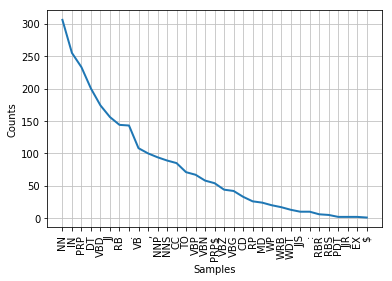

In [24]:
#distribution of tags

pos_dist = nltk.FreqDist(tags)
print(pos_dist.most_common())
pos_dist.plot()

**Lemmatization**

In [25]:
arr = []
for u in words:
    lemmatiser = WordNetLemmatizer()
    arr.append(lemmatiser.lemmatize(u, pos="n"))
    lem_paragraph = ' '.join(arr)

In [26]:
lem_paragraph
#arr

'I am honored to be with you today at your commencement from one of the finest university in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three story from my life. That’s it. No big deal. Just three stories. The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, but then stayed around a a drop-in for another 18 month or so before I really quit. So why did I drop out? It started before I wa born. My biological mother wa a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything wa all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: “We have an 

[('the', 91), ('I', 86), ('to', 71), ('a', 60), ('and', 49), ('wa', 47), ('of', 40), ('that', 38), ('in', 33), ('is', 29), ('it', 28), ('you', 27), ('my', 25), ('had', 22), ('with', 18), ('It', 18), ('for', 17), ('have', 17), ('And', 17), ('all', 16), ('your', 14), ('out', 14), ('what', 14), ('be', 13), ('from', 13), ('me', 12), ('on', 12), ('at', 11), ('so', 11), ('one', 10), ('year', 10), ('about', 9), ('but', 9), ('when', 9), ('do', 9), ('would', 9), ('never', 8), ('life.', 8), ('very', 8), ('college', 7), ('want', 7), ('it.', 7), ('The', 7), ('dropped', 7), ('they', 7), ('we', 7), ('just', 7), ('this', 6), ('first', 6), ('So', 6)]


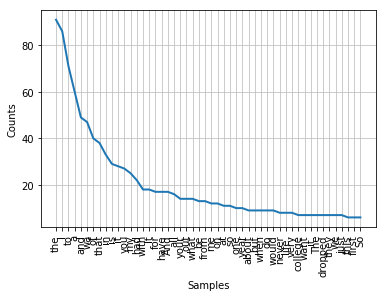

In [27]:
#distribution of lemma

lemma_dist = nltk.FreqDist(arr)
print(lemma_dist.most_common(50))
lemma_dist.plot(50)

In [28]:
#for lemmatization it did not recognised the tags generated by POS tagging, so I had to assume all are nouns.